#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 2 (30 marks)**

##**Submission Instruction**
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A2_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [1]:
#STUDENT ID:219588468
#NAME:HRISHIKESH JOSHI

## Part 1: Clustering *(15 marks)*

Let's assume you want to design an environment to predict a class/category from a dataset based on specific features of that class. However, all the features are not strong enough or in other words features not that much variance/uniqueness across the classes. So, you have to design a clustering model by answering the following questions:

1. Download the attached clustering.csv file. Read the file and separate the class and feature matrix. __(2 marks)__

In [4]:
import pandas as pd
import io
import requests
import numpy as np
url="https://raw.githubusercontent.com/hrishikeshabcd123/ML/master/clustering.csv"
s=requests.get(url).content
clusterdata =pd.read_csv(io.StringIO(s.decode('utf-8')))
print(clusterdata)

cfeatures =  clusterdata.iloc[:,:-1]
cclass = clusterdata.Class


     height  length   width    std    min    max  kurtosis  Class
0     15.26   14.84  0.8710  5.763  3.312  2.221     5.220      0
1     14.88   14.57  0.8811  5.554  3.333  1.018     4.956      0
2     14.29   14.09  0.9050  5.291  3.337  2.699     4.825      0
3     13.84   13.94  0.8955  5.324  3.379  2.259     4.805      0
4     16.14   14.99  0.9034  5.658  3.562  1.355     5.175      0
..      ...     ...     ...    ...    ...    ...       ...    ...
205   12.19   13.20  0.8783  5.137  2.981  3.631     4.870      2
206   11.23   12.88  0.8511  5.140  2.795  4.325     5.003      2
207   13.20   13.66  0.8883  5.236  3.232  8.315     5.056      2
208   11.84   13.21  0.8521  5.175  2.836  3.598     5.044      2
209   12.30   13.34  0.8684  5.243  2.974  5.637     5.063      2

[210 rows x 8 columns]


2. Determine the number of clusters from the dataset. Is this same as the actual number of classes in the dataset? __(1 marks)__

<!-- Choose the best three features using different selection criteria (ANOVA, Chi-squared) based on the purity score for the k-mean cluster (Euclidean distance matrix). Which one is good and why? __(5 marks)__ -->

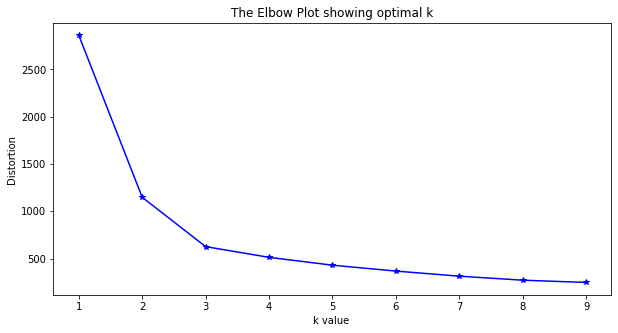

In [5]:


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

temp=clusterdata
dist = []
K=range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k ).fit(temp)
    kmeanModel.fit(temp)
    dist.append(kmeanModel.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, dist, 'b*-')
plt.xlabel('k value ')
plt.ylabel('Distortion')
plt.title('The Elbow Plot showing optimal k')
plt.show()


The elbow plot shows the optimal number of clusters is 3 which is equal to the number of classes(0,1,2) given in the dataset.

3. Perform K-Means clustering on the complete dataset and report purity score. __(2 marks)__ 

In [6]:

kmeans = KMeans(n_clusters = 3)
kmeans = kmeans.fit(cfeatures)
clabels = kmeans.labels_
ccentroids = kmeans.cluster_centers_

print(clabels)
print(ccentroids)

def purity_score(ccentroids):
    matrix = {              
        0: [0,0,0],
        1: [0,0,0],
        2: [0,0,0]
    }
    
    
    for i in range(len(cclass)):
           matrix[clabels[i]][cclass[i]] += 1
    purity_sc = (max(matrix[0])+max(matrix[1])+max(matrix[2]))/len(cclass)
    purity_sc = round(purity_sc*100,2)
    return purity_sc

print("Purity score:", purity_score(ccentroids),"%")


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 2 2 2 0 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]
[[18.72180328 16.29737705  0.88508689  6.20893443  3.72267213  3.60359016
   6.06609836]
 [11.96441558 13.27480519  0.8522      5.22928571  2.87292208  4.75974026
   5.08851948]
 [14.64847222 14.46041667  0.87916667  5.56377778  3.27790278  2.64893333
   5.19231944]]
Purity score: 89.52 %


The purity score of 89.52% indicates approximately 90 of 210 observations are correctly assigned to respective cluster.

4. There are several distance metrics for  K-Means such as euclidean, squared euclidean, Manhattan, Chebyshev, Minkowski. [ __Hints:__ See the pyclustering library for python.]
    - Your job is to compare the purity score of k-means clustering for different distance metrics. __(5 marks)__ 
    - Select the best distance metric and explain why this distance metric is best for the given dataset. __(2 marks)__ 

In [14]:
!pip install pyclustering
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils.metric import distance_metric, type_metric

def pscore(kdist):
    new_matrix = {
        0: [0,0,0],
        1: [0,0,0],
        2: [0,0,0]
    }
    for cluster in range(3):
        for i in kdist[cluster]:
            new_matrix[cluster][cclass[i]] += 1
    pscore = (max(new_matrix[0])+max(new_matrix[1])+max(new_matrix[2]))/len(cclass)
    pscore = round(pscore*100,2)
    return pscore


cinitial = kmeans_plusplus_initializer(cfeatures, 3).initialize()

#Euclidian Method
eu_dist = distance_metric(type_metric.EUCLIDEAN)
eu_instance = kmeans(cfeatures, cinitial,metric=eu_dist)
eu_instance.process()
eu_clusters = eu_instance.get_clusters()
print("Purity score for Euclidian Method:", round(purity_score(eu_clusters),2), "%")

#Manhattan method 
m_dist = distance_metric(type_metric.MANHATTAN)
m_instance = kmeans(cfeatures, cinitial, metric=m_dist)
m_instance.process()
m_clusters = m_instance.get_clusters()
print("Purity score for Manhattan Method:", round(purity_score(m_clusters),2), "%")

#Squared euclidean method
sqeu_dist = distance_metric(type_metric.EUCLIDEAN_SQUARE)
sqeu_instance = kmeans(cfeatures, cinitial, metric=sqeu_dist)
sqeu_instance.process()
sqeu_clusters = sqeu_instance.get_clusters()
print("Purity score for Squared euclidian method:",round(purity_score(sqeu_clusters),2),"%")

#Chebysev method
ch_dist = distance_metric(type_metric.CHEBYSHEV)
ch_instance = kmeans(cfeatures, cinitial, metric=ch_dist)
ch_instance.process()
ch_clusters = ch_instance.get_clusters()
print("Purity score for Chebysev method:",round(purity_score(ch_clusters),2),"%")

#Minkowski method, p = 4
mi_dist = distance_metric(type_metric.MINKOWSKI, degree =4)
mi_instance = kmeans(cfeatures, cinitial, metric=mi_dist)
mi_instance.process()
mi_clusters = mi_instance.get_clusters()
print("Purity score for Minkowski method:",round(purity_score(mi_clusters),2),"%")

Purity score for Euclidian Method: 89.52 %
Purity score for Manhattan Method: 89.52 %
Purity score for Squared euclidian method: 89.52 %
Purity score for Chebysev method: 89.52 %
Purity score for Minkowski method: 89.52 %


The best purity score has been obtained for Euclidean metric.

5. Use selection criteria (ANOVA, Chi-squared) to select best three features and use them for K-Means clustering. Based on the purity score which feature set are you going to recommend and why? __(3 marks)__

In [15]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
chiselect= SelectKBest(chi2, k=3)
chidata= chiselect.fit_transform(cfeatures,cclass)
print("Best 3 features calculated using chi square test:",clusterdata.columns[chiselect.get_support(indices=True)].tolist())

Best 3 features calculated using chi square test: ['height', 'length', 'max']


In [16]:

chidata = pd.DataFrame(chidata, columns=["height","length","max"])
print(chidata.head()) #new dataset with 3 best features from Chi square selection
chi_kmeans = KMeans(n_clusters = 3).fit(chidata)
clabels = chi_kmeans.labels_

#assigning labels to clustering matrix
chi_matrix = {
    0: [0,0,0],
    1: [0,0,0],
    2: [0,0,0]
}
for i in range(len(cclass)):
    chi_matrix[clabels[i]][cclass[i]] += 1
    
chi_purity = (max(chi_matrix[0])+max(chi_matrix[1])+max(chi_matrix[2]))/len(cclass)
print("Purity score:",round(chi_purity*100, 2),"%")


   height  length    max
0   15.26   14.84  2.221
1   14.88   14.57  1.018
2   14.29   14.09  2.699
3   13.84   13.94  2.259
4   16.14   14.99  1.355
Purity score: 89.52 %


In [17]:

anovaselect= SelectKBest(f_classif, k=3)
anovadata= anovaselect.fit_transform(cfeatures,cclass)
print("Best 3 features calculated using ANNOVA test",clusterdata.columns[anovaselect.get_support(indices=True)].tolist()) #getting the 3 best columns i.e. features


Best 3 features calculated using ANNOVA test ['height', 'length', 'min']


In [18]:

anovadata= pd.DataFrame(anovadata, columns=["height","lenght","min"])
print(anovadata.head()) #new dataset with 3 best features from ANOVA selection
anova_kmeans = KMeans(n_clusters = 3).fit(anovadata)
anova_labels = anova_kmeans.labels_

matrix_anova = {
    0: [0,0,0],
    1: [0,0,0],
    2: [0,0,0]
}
for i in range(len(cclass)):
   matrix_anova[anova_labels[i]][cclass[i]] += 1

anova_purity = (max(matrix_anova[0])+max(matrix_anova[1])+max(matrix_anova[2]))/len(cclass)
print("Purity score:",round(anova_purity*100, 2),"%")

   height  lenght    min
0   15.26   14.84  3.312
1   14.88   14.57  3.333
2   14.29   14.09  3.337
3   13.84   13.94  3.379
4   16.14   14.99  3.562
Purity score: 84.29 %


From the above results, we can see the purity score for the dataset with Chi-square selection method is higher and matches to the purity score of the original dataset.Hence, chi square feature selection is more appropriate with the best features being 'height, 'length' and 'max'.

# Part-2 (Dimensionality Reduction using PCA/SVD) *(15 marks)*

1. For the dataset (clustering.csv), perform PCA.
    - plot the captured variance with respect to increasing latent dimensionality. __(2.5 marks)__
  
  What is the minimum dimension that captures:
    - at least 89% variance? __(1.5 marks)__
    - at least 99% variance? __(1 marks)__

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
**************************************************
[0.64839201 0.21223507 0.08488145 0.04618012 0.00564185 0.00191687
 0.00066636]
**************************************************
[64.84 86.06 94.55 99.17 99.73 99.92 99.99]
**************************************************


Text(0, 0.5, 'Variance')

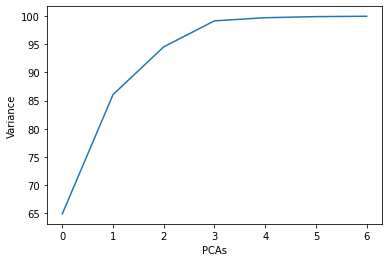

In [23]:

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
nomralized = scale(clusterdata)


from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca = pca.fit(nomralized)
print(pca)
print('*'*50)
V= pca.explained_variance_ratio_
print(V)
print('*'*50)
V1=np.cumsum(np.round(V, decimals=4)*100)
print(V1)
print('*'*50)
plt.plot(V1)
plt.xlabel("PCAs")
plt.ylabel("Variance")


In [24]:

PCA89 = PCA(n_components= 0.89)
DATA89 = PCA89.fit_transform(nomralized)
print("Minimum dimension capturing atleast 89% variance:",DATA89.shape[1])


DATA99 = PCA(n_components= 0.99)
DATA99 = DATA99.fit_transform(nomralized)
print("Minimum dimension capturing atleast 99% variance:",DATA99.shape[1])

Minimum dimension capturing atleast 89% variance: 3
Minimum dimension capturing atleast 99% variance: 4


2. Determine the purity of clusters formed by the number of principal components which captured 89% and 99% variances respectively. Plot a line graph of the purity scores against the captured variances. Discuss your findings. __(7 marks)__

The purity score for k-mean on clusters capturing atleast 89% variance: 97.14 %
The purity score for k-mean on clusters capturing atleast 89% variance: 98.1 %


Text(0.5, 0, 'Purity scores in %')

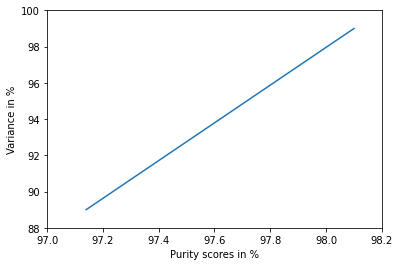

In [30]:
kVAR89= KMeans(n_clusters = 3).fit(DATA89)
VAR89_labels = kVAR89.labels_

matrix_VAR89 = {
    0: [0,0,0],
    1: [0,0,0],
    2: [0,0,0]
}
for i in range(len(cclass)):
    matrix_VAR89[VAR89_labels[i]][cclass[i]] += 1


VAR89_purity = (max(matrix_VAR89[0])+max(matrix_VAR89[1])+max(matrix_VAR89[2]))/len(cclass)
print("The purity score for k-mean on clusters capturing atleast 89% variance:",round(VAR89_purity*100,2),"%")

kVAR99 = KMeans(n_clusters = 3).fit(DATA99)
VAR99_labels = kVAR99.labels_

matrix_VAR99 = {
    0: [0,0,0],
    1: [0,0,0],
    2: [0,0,0]
}
for i in range(len(cclass)):
    matrix_VAR99[VAR99_labels[i]][cclass[i]] += 1

VAR99_purity = (max(matrix_VAR99[0])+max(matrix_VAR99[1])+max(matrix_VAR99[2]))/len(cclass)
print("The purity score for k-mean on clusters capturing atleast 89% variance:",round(VAR99_purity*100,2),"%")

purity_scores = [round(VAR89_purity*100,2),round(VAR99_purity*100,2)] 
variances = [89,99]
plt.ylim(88, 100)
plt.xlim(97, 98.2)
plt.plot(purity_scores,variances)
plt.ylabel("Variance in %")
plt.xlabel("Purity scores in %")

3. Let's assume you have two datasets one is linear and another is curved structural data.
    - Can we apply PCA on these datasets? Justify your answer. __(3 marks)__ 

In [31]:
#For getting the optimum output,It's neccesary that PCA is applied on linaerly structured data where variables are scaled with same unit,It's also necessary that data is normalized before performing PCA
#PCA Performes rotation over given axes,Since rotation operatior is a linear operator & axis frame captures every bit of variance,We can't apply PCA on curved dataset.
#If we apply PCA on curved datast,then there will be high number of dimensions with nonzero weight & the goal of PCA is to minizie them with significent weight

